In [1]:
!pip install numpy pandas matplotlib xgboost seaborn mlflow boto3 kagglehub


     |████████████████████████████████| 17.3 MB 816 kB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 52.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 25.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 23.7 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 22.7 MB/s eta 0:00:01
     |████████████████████████████████| 26.7 MB 27.3 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 37.0 MB/s eta 0:00:01
     |████████████████████████████████| 346 kB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 507 kB 32.5 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 52.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 39.1 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 46.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 19.4 MB/s eta 0:00:01
     |██████████████████████████

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost 
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.xgboost
from mlflow.models import infer_signature
from datetime import datetime


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
import kagglehub
import os
import shutil
path = kagglehub.dataset_download('oles04/top-leagues-player', force_download=True)
destination_path = '/root/code/Market-Value-Prediction-Tracking-with-MLflow/Dataset'
shutil.copytree(path, destination_path, dirs_exist_ok=True)

df_players = pd.read_csv('./Dataset/top5_leagues_player.csv', index_col = [0])
df_players.head()


100%|██████████| 119k/119k [00:00<00:00, 163kB/s]

Extracting model files...


,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


In [5]:
df_players.describe()


,age,height,price,max_price,shirt_nr
count,2612.000000,2601.000000,2602.000000,2606.000000,2612.000000
mean,26.305513,1.830892,10.650711,17.304729,20.495789
std,4.645297,0.067255,15.773271,21.948577,17.914206
min,17.000000,1.630000,0.025000,0.025000,1.000000
25%,23.000000,1.780000,1.800000,3.500000,8.000000
50%,26.000000,1.830000,4.500000,10.000000,17.000000
75%,30.000000,1.880000,13.000000,22.000000,27.000000
max,42.000000,2.060000,180.000000,200.000000,99.000000


In [6]:
df_players.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2612 entries, 0 to 2611
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2612 non-null   object 
 1   full_name         1480 non-null   object 
 2   age               2612 non-null   int64  
 3   height            2601 non-null   float64
 4   nationality       2612 non-null   object 
 5   place_of_birth    2595 non-null   object 
 6   price             2602 non-null   float64
 7   max_price         2606 non-null   float64
 8   position          2612 non-null   object 
 9   shirt_nr          2612 non-null   int64  
 10  foot              2576 non-null   object 
 11  club              2612 non-null   object 
 12  contract_expires  2544 non-null   object 
 13  joined_club       2612 non-null   object 
 14  player_agent      2353 non-null   object 
 15  outfitter         1003 non-null   object 
 16  league            2612 non-null   object 
dtype

In [7]:
# filter columns with empty values
empty_cols = df_players.columns[df_players.isna().any()].tolist()

# create separate df only with columns which consist empty values
df_isnull = df_players[empty_cols]

print(df_isnull.isnull().sum())


full_name           1132
height                11
place_of_birth        17
price                 10
max_price              6
foot                  36
contract_expires      68
player_agent         259
outfitter           1609
dtype: int64


In [8]:
df_players = df_players.dropna(subset=['contract_expires', 'foot', 'height', 'foot', 'price', 'max_price'])
df_players.shape


(2498, 17)

<Axes: >

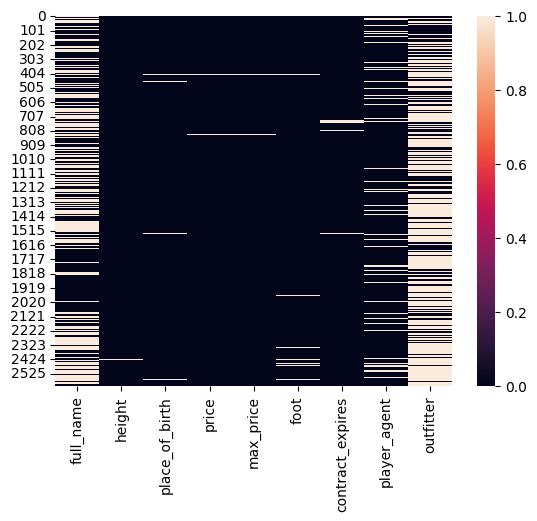

In [9]:
sns.heatmap(df_isnull.isnull())


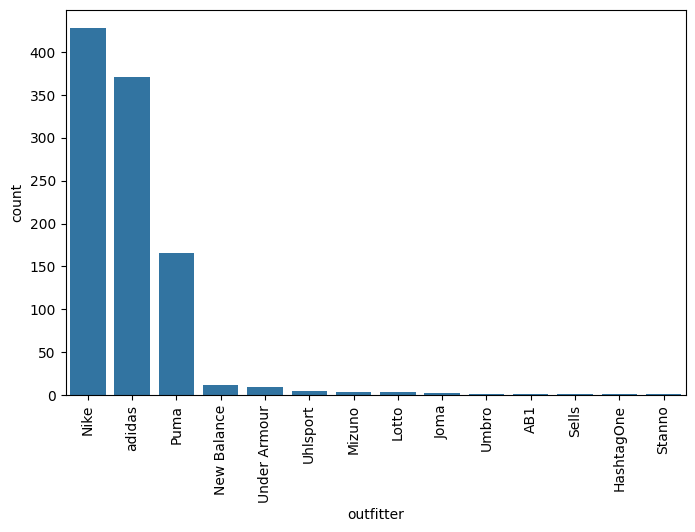

In [10]:
plt.figure(figsize=(8,5))

outfitter_counts = df_isnull['outfitter'].value_counts()


# Convert outfitter_counts to a DataFrame
outfitter_counts_df = outfitter_counts.reset_index()
outfitter_counts_df.columns = ['outfitter', 'count']  # Rename columns for clarity

# Plot using the new DataFrame
sns.barplot(data=outfitter_counts_df, x='outfitter', y='count')

# Rotate the x-axis labels by 90 degrees
ax = plt.gca()
ax.tick_params(axis='x', labelrotation=90)


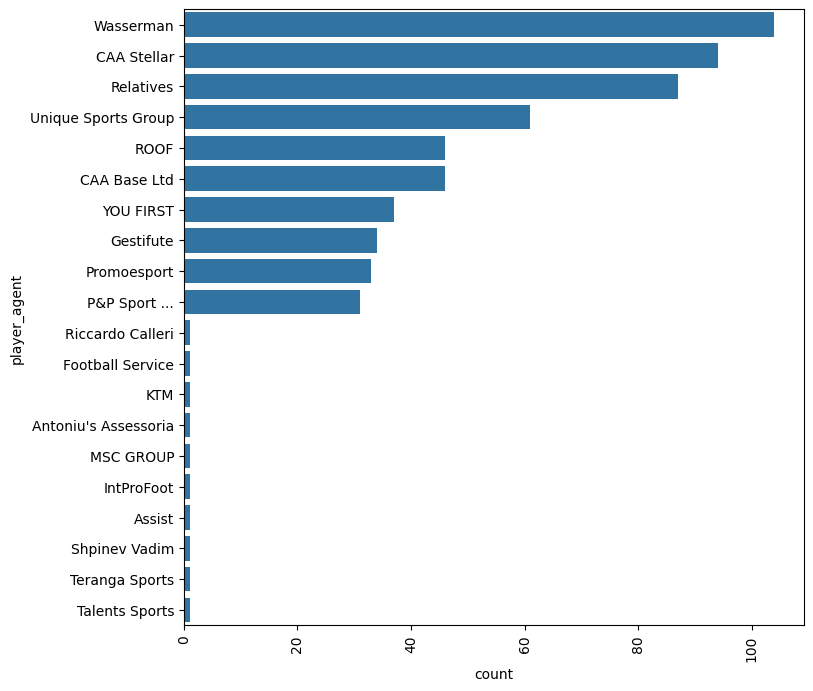

In [11]:
plt.figure(figsize=(8,8))

# Get only top 10 and last 10 counts
outfitter_counts = df_isnull['player_agent'].value_counts()
top_10 = outfitter_counts.head(10)
last_10 = outfitter_counts.tail(10)
plot_data = pd.concat([top_10, last_10]).reset_index()

# Rename columns for clarity
plot_data.columns = ['player_agent', 'count']

# Plot using the new DataFrame
sns.barplot(data=plot_data, x='count', y='player_agent')

# Rotate the y-axis labels by 90 degrees, if desired
plt.xticks(rotation=90)
plt.show()


In [12]:
# should be valid because only 'player_agent' and 'outfitter' have nan values
df_players = df_players.replace(np.nan, 'unknown')
df_players.head()


,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Ederson,unknown,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,unknown,EPL
2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


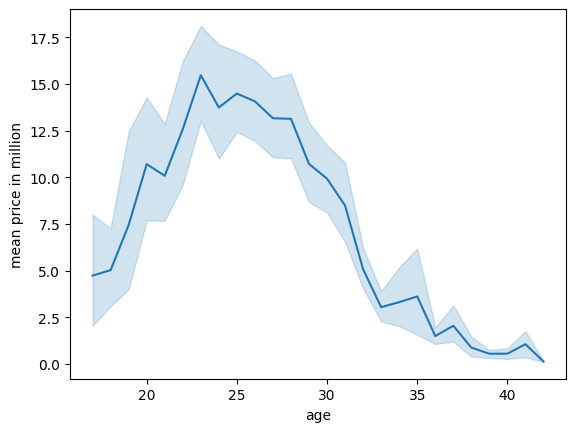

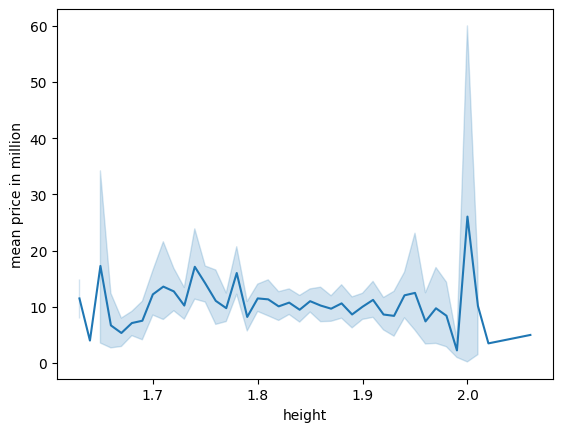

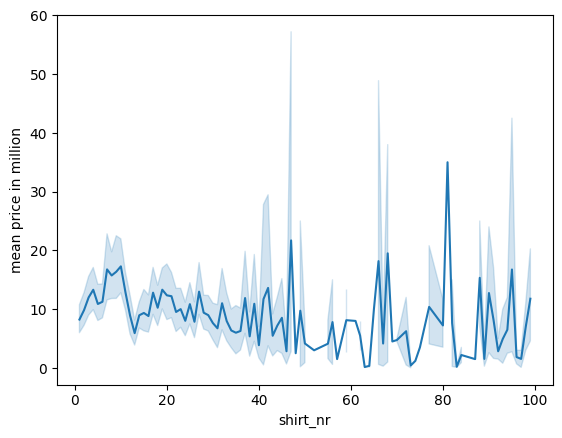

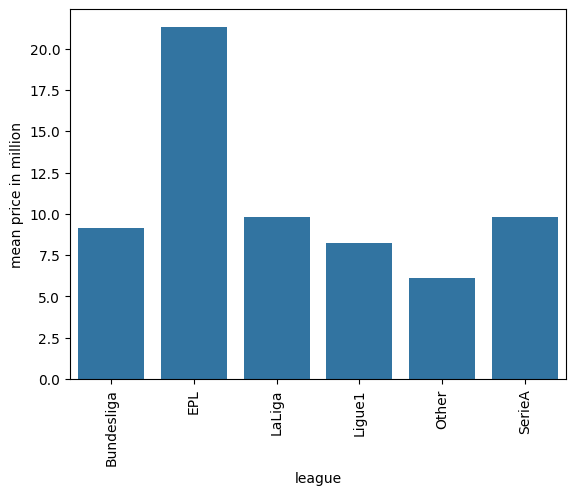

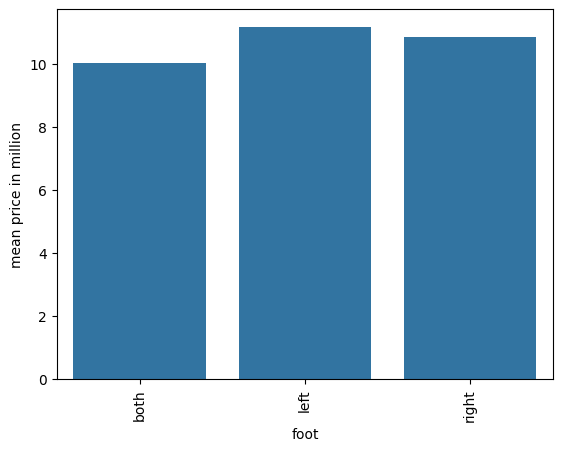

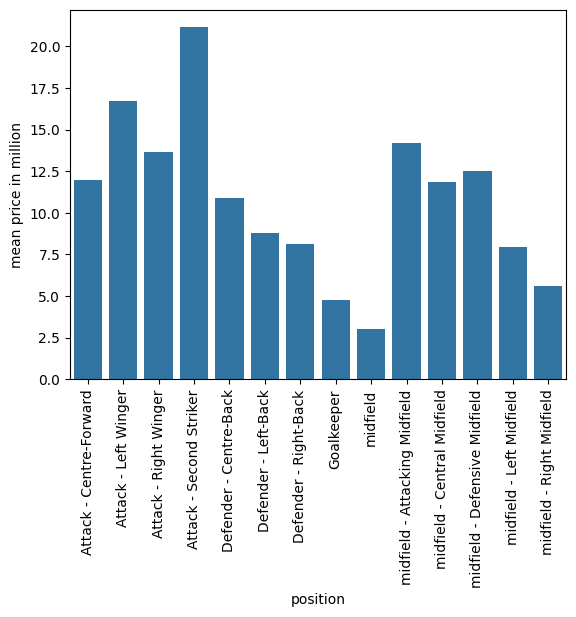

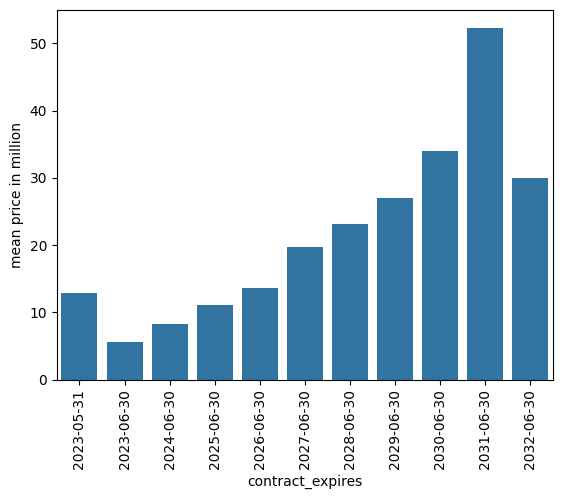

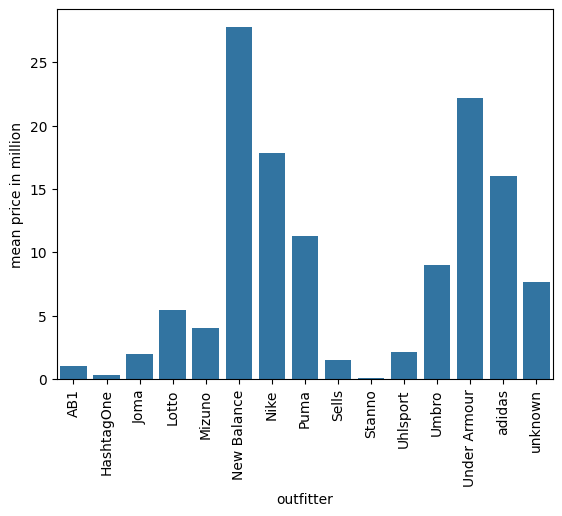

In [13]:
def plotting(df, feature):
    df_mean = df.groupby(feature)['price'].mean().reset_index()
    sns.barplot(data=df_mean, x=feature, y='price')

    # Rotate the x-axis labels by 90 degrees
    ax = plt.gca()
    ax.tick_params(axis='x', labelrotation=90)
    plt.ylabel('mean price in million')
    plt.show()

def plottingLine(df, feature):
    sns.lineplot(data=df, x=feature, y='price')
    plt.ylabel('mean price in million')
    plt.show()
    

feature_list = ['league', 'foot', 'position', 'contract_expires', 'outfitter']

numarical_features = ['age', 'height', 'shirt_nr']

for feature in numarical_features:
    plottingLine(df_players, feature)

for feature in feature_list:
    plotting(df_players, feature)	


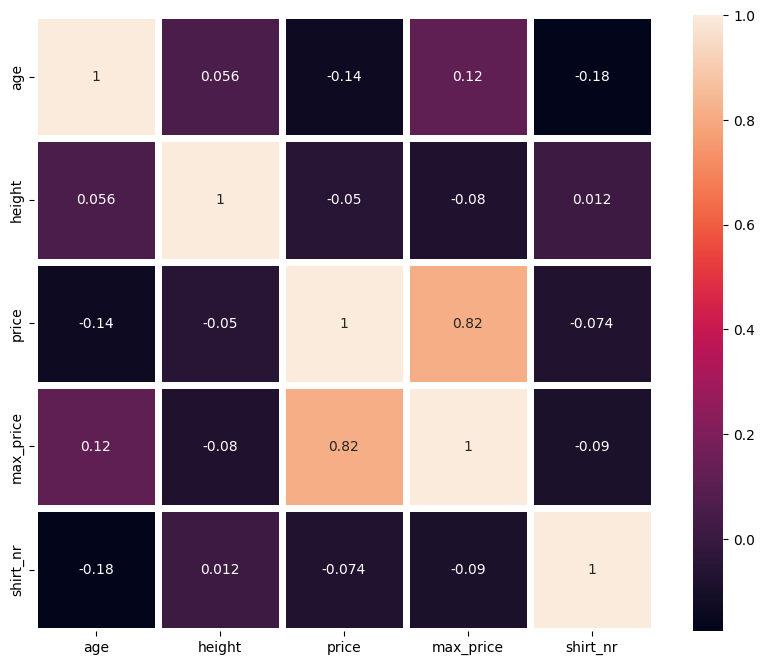

In [14]:
# Select only numeric columns for correlation
numeric_df = df_players.select_dtypes(include='number')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, linewidth=5)
plt.show()



In [15]:
df_target = df_players[['price']]
df_features = df_players[['age', 'height', 'league','foot', 'position', 'club',
                        'contract_expires', 'joined_club', 'player_agent', 'outfitter', 'nationality']]
for column in df_features.columns:
    unique_values = df_features[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
columns_to_encode = ['league' ,'foot', 'position', 'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter', 'nationality']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

df_features_encoded = ct.fit_transform(df_features)

df_features_encoded.shape


Unique values in column 'age': [29 30 37 26 28 27 22 32 18 20 31 21 23 19 38 24 33 25 36 35 34 41 39 17
 40 42]
Unique values in column 'height': [1.88 1.85 1.87 1.8  1.89 1.71 1.83 1.69 1.91 1.79 1.77 1.81 1.73 1.82
 1.95 1.7  1.94 1.86 1.93 1.92 1.78 1.9  1.75 1.72 1.74 1.96 1.84 1.97
 2.01 1.98 1.63 1.76 1.67 1.99 1.65 2.   1.68 1.66 2.02 1.64 2.06]
Unique values in column 'league': ['EPL' 'Other' 'Bundesliga' 'SerieA' 'LaLiga' 'Ligue1']
Unique values in column 'foot': ['left' 'right' 'both']
Unique values in column 'position': ['Goalkeeper' 'Defender - Centre-Back' 'Defender - Left-Back'
 'Defender - Right-Back' 'midfield - Defensive Midfield'
 'midfield - Central Midfield' 'midfield - Attacking Midfield'
 'Attack - Left Winger' 'Attack - Right Winger' 'Attack - Centre-Forward'
 'Attack - Second Striker' 'midfield - Left Midfield'
 'midfield - Right Midfield' 'midfield']
Unique values in column 'club': ['Man City' 'Chelsea' 'Chelsea U21' 'Arsenal' 'Liverpool' 'Man Utd'
 'Tottenham'

(2498, 1802)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df_features_encoded, df_target, test_size = 0.3, random_state=22)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')


x_train: (1748, 1802)
x_test: (750, 1802)
y_train: (1748,)
y_test: (750,)


In [17]:
# Set MLflow tracking URI
mlflow.set_tracking_uri("https://66e509f05a9319f04690f279.bm-north.lab.poridhi.io/proxy/5000/")
# Set experiment name
mlflow.set_experiment("market_value_prediction")


2025/02/01 22:10:57 INFO mlflow.tracking.fluent: Experiment with name 'market_value_prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://marketvalue001/1', creation_time=1738447858933, experiment_id='1', last_update_time=1738447858933, lifecycle_stage='active', name='market_value_prediction', tags={}>

In [18]:
param_grid = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [0.03, 0.05],
              'max_depth': [4, 7],
              'min_child_weight': [2,3,4],
              'subsample': [0.5, 0.3],
              'colsample_bytree': [0.7],
              'n_estimators': [300]}

param_grid


{'nthread': [4],
 'objective': ['reg:squarederror'],
 'learning_rate': [0.03, 0.05],
 'max_depth': [4, 7],
 'min_child_weight': [2, 3, 4],
 'subsample': [0.5, 0.3],
 'colsample_bytree': [0.7],
 'n_estimators': [300]}

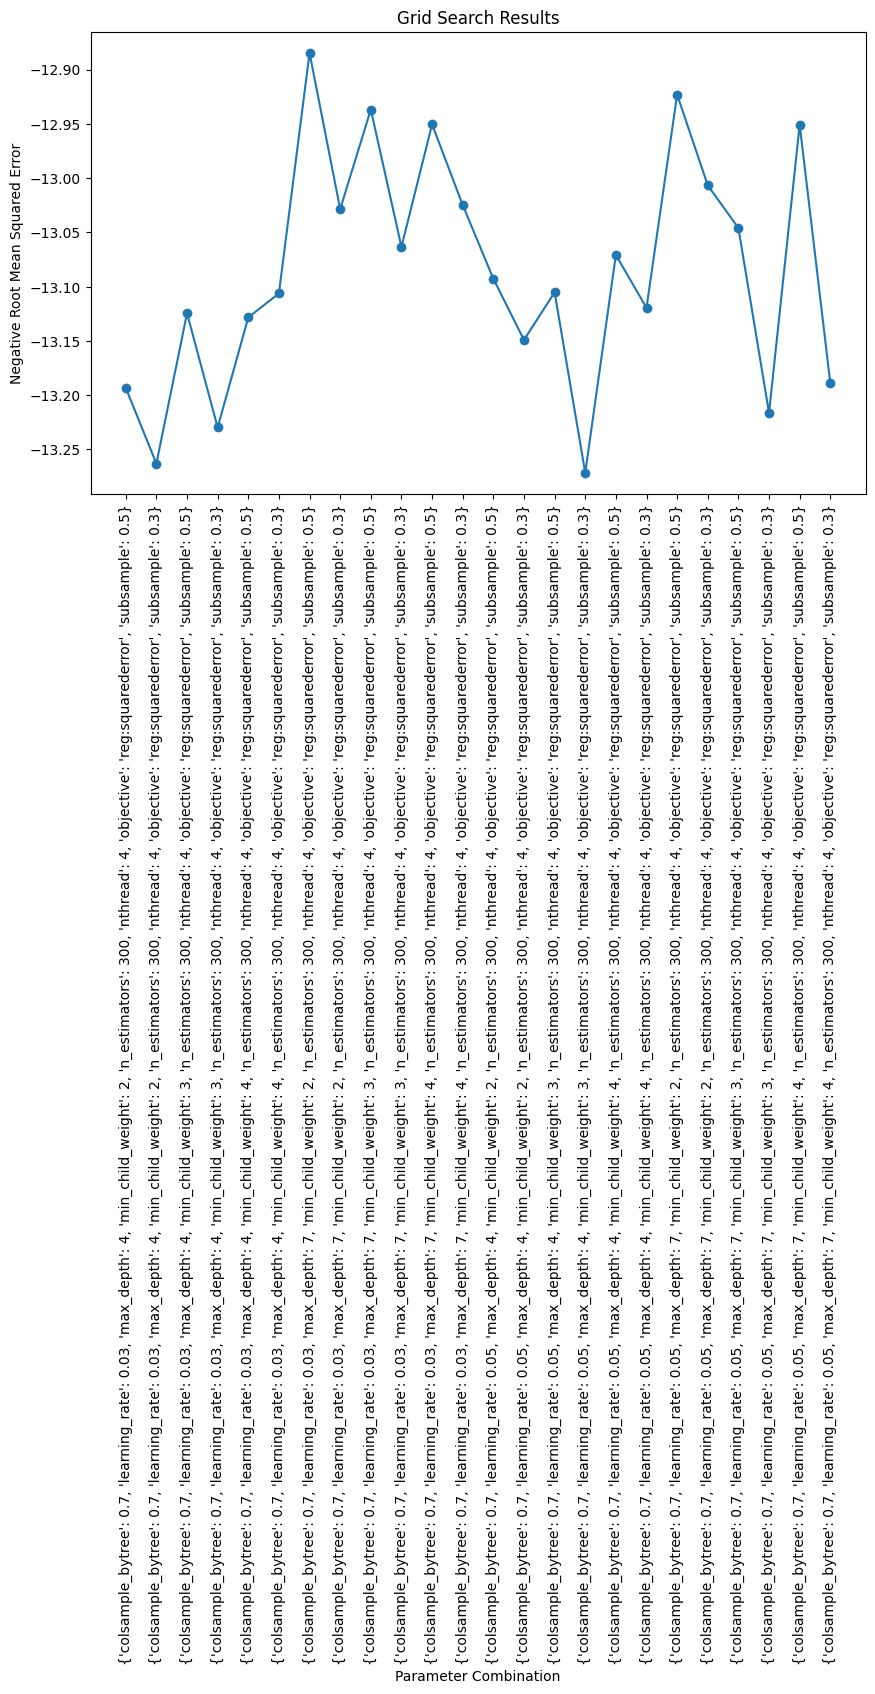

2025/02/01 22:11:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run grid_search_20250201_2211 at: https://66e509f05a9319f04690f279.bm-north.lab.poridhi.io/proxy/5000/#/experiments/1/runs/46c62a7038ca492089276b7535d33f5c.
2025/02/01 22:11:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://66e509f05a9319f04690f279.bm-north.lab.poridhi.io/proxy/5000/#/experiments/1.


In [19]:
with mlflow.start_run(run_name=f"grid_search_{datetime.now().strftime('%Y%m%d_%H%M')}"):
    # Log the search space
    mlflow.log_params({"search_space": str(param_grid)})
    
    xgb = xgboost.XGBRegressor(objective='reg:linear')
    grid_search = GridSearchCV(
        estimator=xgb, 
        param_grid=param_grid, 
        scoring='neg_root_mean_squared_error', 
        cv=4
    )
    
    grid_search.fit(x_train, y_train)
    
    # Log best parameters
    mlflow.log_params(grid_search.best_params_)
    
    # Log best score
    mlflow.log_metric("best_cv_score", -grid_search.best_score_)
    
    # Create and save parameter comparison plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(grid_search.cv_results_['mean_test_score'])), 
            grid_search.cv_results_['mean_test_score'], 
            marker='o')
    plt.xlabel('Parameter Combination')
    plt.ylabel('Negative Root Mean Squared Error')
    plt.title('Grid Search Results')
    plt.xticks(range(len(grid_search.cv_results_['params'])), 
              grid_search.cv_results_['params'], 
              rotation=90)
    
    # Save plot as artifact
    plt.savefig("grid_search_results.png")
    mlflow.log_artifact("grid_search_results.png")
    plt.show()

best_params = grid_search.best_params_


<Figure size 1000x600 with 0 Axes>

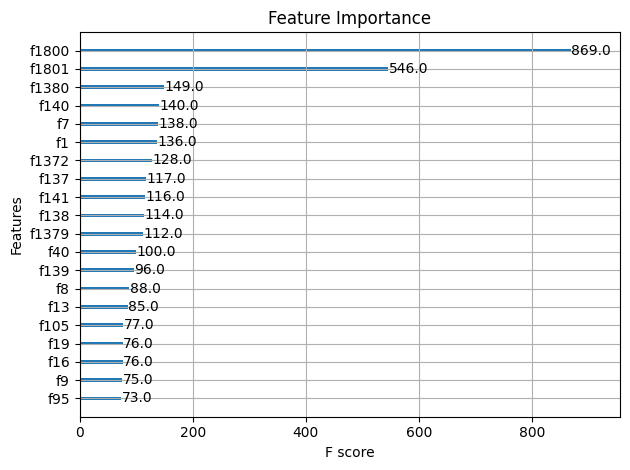

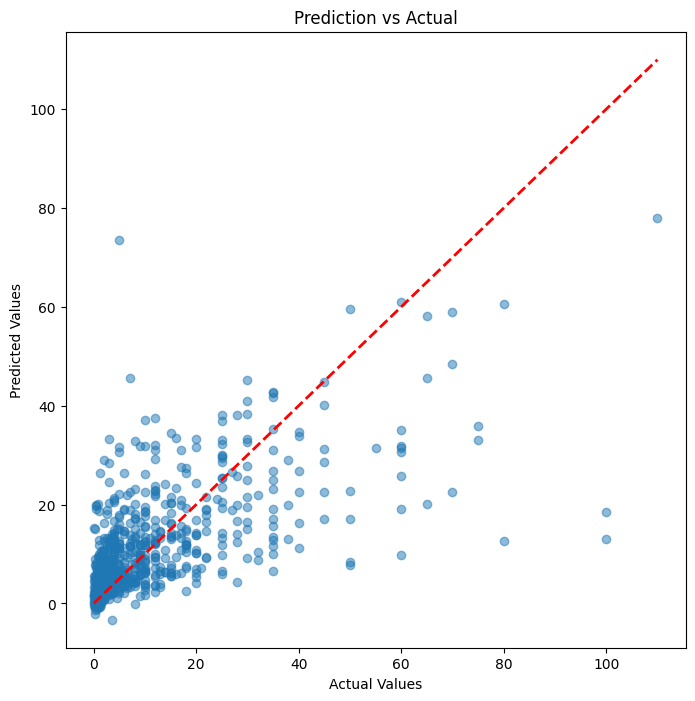

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [22:11:52] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
Successfully registered model 'MarketValuePredictor'.
2025/02/01 22:11:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: MarketValuePredictor, version 1
Created version '1' of model 'MarketValuePredictor'.
2025/02/01 22:11:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run model_training_20250201_2211 at: https://66e509f05a9319f04690f279.bm-north.lab.poridhi.io/proxy/5000/#/experiments/1/runs/6c0e66ba5a35435f8b2d402d20d6a5d8.
2025/02/01 22:11:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://66e509f05a9319f04690f279.bm-north.lab.poridhi.io/proxy/5000/#/experiments/1.


In [20]:

with mlflow.start_run(run_name=f"model_training_{datetime.now().strftime('%Y%m%d_%H%M')}"):
    # Log training dataset info
    mlflow.log_param("training_samples", x_train.shape[0])
    mlflow.log_param("features_count", x_train.shape[1])
    
    # Log best parameters again in this run
    mlflow.log_params(best_params)
    
    # Create and train model
    best_xgb = xgboost.XGBRegressor(**best_params)
    best_xgb.fit(x_train, y_train)
    
    # Make predictions
    train_predictions = best_xgb.predict(x_train)
    test_predictions = best_xgb.predict(x_test)
    
    # Calculate and log metrics
    metrics = {
        "train_mae": mean_absolute_error(y_train, train_predictions),
        "test_mae": mean_absolute_error(y_test, test_predictions),
        "train_mse": mean_squared_error(y_train, train_predictions),
        "test_mse": mean_squared_error(y_test, test_predictions),
        "train_rmse": np.sqrt(mean_squared_error(y_train, train_predictions)),
        "test_rmse": np.sqrt(mean_squared_error(y_test, test_predictions))
    }
    
    mlflow.log_metrics(metrics)
    
    # Feature importance plot
    plt.figure(figsize=(10, 6))
    xgboost.plot_importance(best_xgb, max_num_features=20)
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")
    plt.show()
    
    # Prediction scatter plot
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, test_predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Prediction vs Actual")
    plt.savefig("prediction_scatter.png")
    mlflow.log_artifact("prediction_scatter.png")
    plt.show()
    
    # Log the model
    signature = infer_signature(x_train, train_predictions)
    mlflow.xgboost.log_model(
        best_xgb, 
        "market_value_model",
        signature=signature,
        registered_model_name="MarketValuePredictor"
    )


In [21]:
def transition_model_stage(model_name, version, stage):
    client = mlflow.tracking.MlflowClient()
    client.transition_model_version_stage(
        name=model_name,
        version=version,
        stage=stage
    )


In [22]:
def load_production_model():
    model = mlflow.pyfunc.load_model(
        model_uri=f"models:/MarketValuePredictor/Production"
    )
    return model


In [23]:
print("Model evaluation metrics:")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

transition_model_stage("MarketValuePredictor", 1, "Staging")
transition_model_stage("MarketValuePredictor", 1, "Production")



Model evaluation metrics:
train_mae: 4.8179
test_mae: 6.7293
train_mse: 51.1437
test_mse: 127.8657
train_rmse: 7.1515
test_rmse: 11.3078


/tmp/ipykernel_6182/3594572754.py:3: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


In [24]:
model = load_production_model()
model


/usr/local/lib/python3.8/dist-packages/mlflow/store/artifact/utils/models.py:31: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


mlflow.pyfunc.loaded_model:
  artifact_path: market_value_model
  flavor: mlflow.xgboost
  run_id: 6c0e66ba5a35435f8b2d402d20d6a5d8